In [1]:
# Importing Libraries

import pandas as pd # used for data manipulation
import numpy as np # used for numerical analysis
from collections import Counter as c # return counts of number of classes
import matplotlib.pyplot as plt # used for data Visualization
import seaborn as sns # data visualization library
# import missingno as msno # finding missing values
from sklearn.metrics import accuracy_score, confusion_matrix # model performance
from sklearn.model_selection import train_test_split # splits data in random train and test array
from sklearn.preprocessing import LabelEncoder # encoding the levels of categorical features
from sklearn.linear_model import LogisticRegression # Classification ML algorithm
import pickle # Python object hierarchy is converted into a byte stream,


In [2]:
data = pd.read_csv("kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
# Activity 2.1: Rename the columns

data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [4]:
data.columns=['id','age', 'blood_pressure', 'specific_gravity', 'albumin','sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 
              'blood glucose random', 'blood_urea','serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 
              'white_blood_cell_count', 'red_blood_cell_count','hypertension', 'diabetesmellitus', 'coronary_artery_disease', 'appetite',
              'pedal_edema', 'anemia', 'class']
# manually giving the name of the columns
data.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [5]:
data.shape

(400, 26)

In [6]:
# Activity 2.2: Handling missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [7]:
data.isnull().any()

id                         False
age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [8]:
data.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood glucose random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [9]:
# # Convert non-numeric columns to numbers
# data['packed_cell_volume'] = pd.to_numeric(data['packed_cell_volume'], errors='coerce')
# data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'], errors='coerce')

# # Fill missing values with column mean (safe way)
# data['blood glucose random'] = data['blood glucose random'].fillna(data['blood glucose random'].mean())
# data['blood_pressure'] = data['blood_pressure'].fillna(data['blood_pressure'].mean())
# data['blood_urea'] = data['blood_urea'].fillna(data['blood_urea'].mean())
# data['hemoglobin'] = data['hemoglobin'].fillna(data['hemoglobin'].mean())
# data['packed_cell_volume'] = data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean())
# data['potassium'] = data['potassium'].fillna(data['potassium'].mean())
# data['red_blood_cell_count'] = data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean())


In [10]:
# data['age'] = data['age'].fillna(data['age'].mode()[0])
# data['hypertension'] = data['hypertension'].fillna(data['hypertension'].mode()[0])
# data['pus_cell_clumps'] = data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0])
# data['appetite'] = data['appetite'].fillna(data['appetite'].mode()[0])
# data['albumin'] = data['albumin'].fillna(data['albumin'].mode()[0])
# data['pus_cell'] = data['pus_cell'].fillna(data['pus_cell'].mode()[0])
# data['red_blood_cells'] = data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0])
# data['coronary_artery_disease'] = data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0])
# data['bacteria'] = data['bacteria'].fillna(data['bacteria'].mode()[0])
# data['anemia'] = data['anemia'].fillna(data['anemia'].mode()[0])
# data['sugar'] = data['sugar'].fillna(data['sugar'].mode()[0])
# data['diabetesmellitus'] = data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0])
# data['pedal_edema'] = data['pedal_edema'].fillna(data['pedal_edema'].mode()[0])
# data['specific_gravity'] = data['specific_gravity'].fillna(data['specific_gravity'].mode()[0])


In [11]:
# data.isnull().sum()

In [12]:
# # For categorical columns (use mode):

# data['red_blood_cells'] = data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0])
# data['pus_cell'] = data['pus_cell'].fillna(data['pus_cell'].mode()[0])
# data['pus_cell_clumps'] = data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0])
# data['bacteria'] = data['bacteria'].fillna(data['bacteria'].mode()[0])
# data['hypertension'] = data['hypertension'].fillna(data['hypertension'].mode()[0])
# data['diabetesmellitus'] = data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0])
# data['coronary_artery_disease'] = data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0])
# data['appetite'] = data['appetite'].fillna(data['appetite'].mode()[0])
# data['pedal_edema'] = data['pedal_edema'].fillna(data['pedal_edema'].mode()[0])
# data['anemia'] = data['anemia'].fillna(data['anemia'].mode()[0])


In [13]:
# # For numerical columns (use mean):

# data['age'].fillna(data['age'].mean(), inplace=True)
# data['blood_pressure'].fillna(data['blood_pressure'].mean(), inplace=True)
# data['blood glucose random'].fillna(data['blood glucose random'].mean(), inplace=True)
# data['blood_urea'].fillna(data['blood_urea'].mean(), inplace=True)
# data['serum_creatinine'].fillna(data['serum_creatinine'].mean(), inplace=True)
# data['sodium'].fillna(data['sodium'].mean(), inplace=True)
# data['potassium'].fillna(data['potassium'].mean(), inplace=True)
# data['hemoglobin'].fillna(data['hemoglobin'].mean(), inplace=True)
# data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(), inplace=True)
# data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(), inplace=True)
# data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(), inplace=True)


In [14]:
# import pandas as pd

# # ----------- STEP 1: Define columns -----------
# # Columns to fill with mean (numeric)
# mean_fill_cols = [
#     'age', 'blood_pressure', 'blood glucose random', 'blood_urea',
#     'serum_creatinine', 'sodium', 'potassium', 'hemoglobin',
#     'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count'
# ]

# # Columns to fill with mode (categorical)
# mode_fill_cols = [
#     'specific_gravity', 'albumin', 'sugar',
#     'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
#     'hypertension', 'diabetesmellitus', 'coronary_artery_disease',
#     'appetite', 'pedal_edema', 'anemia'
# ]

# # ----------- STEP 2: Fill numeric columns with mean -----------
# for col in mean_fill_cols:
#     data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric safely
#     data[col] = data[col].fillna(data[col].mean())         # Fill NaN with mean

# # ----------- STEP 3: Fill categorical columns with mode -----------
# for col in mode_fill_cols:
#     data[col] = data[col].fillna(data[col].mode()[0])       # Fill NaN with mode


In [15]:
import pandas as pd

# Assume your DataFrame is called 'data'

# Convert numeric columns to numeric type (just in case)
numeric_cols = [
    'age', 'blood_pressure', 'blood glucose random', 'blood_urea',
    'serum_creatinine', 'sodium', 'potassium', 'hemoglobin',
    'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count'
]
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Fill numeric columns with mean
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].mean())

# Fill all other columns with mode
for col in data.columns:
    if data[col].isnull().sum() > 0 and col not in numeric_cols:
        data[col] = data[col].fillna(data[col].mode()[0])


In [16]:
# data.isnull().sum()

In [17]:
# catcols = set(data.dtypes[data.dtypes=='0'].index.values)
# print(catcols)

In [18]:
# for i in catcols:
#     print("Columns:",i)
#     print(c(data[i]))
#     print('*'*120+'\n')

In [19]:
# Handling Categorical columns

catcols = set(data.select_dtypes(include='object').columns)
print(catcols)


{'class', 'appetite', 'coronary_artery_disease', 'red_blood_cells', 'pedal_edema', 'bacteria', 'diabetesmellitus', 'pus_cell', 'pus_cell_clumps', 'anemia', 'hypertension'}


In [20]:
for i in catcols:
    print("Columns:",i)
    print(c(data[i]))
    print('*'*120+'\n')

Columns: class
Counter({'ckd': 248, 'notckd': 150, 'ckd\t': 2})
************************************************************************************************************************

Columns: appetite
Counter({'good': 318, 'poor': 82})
************************************************************************************************************************

Columns: coronary_artery_disease
Counter({'no': 364, 'yes': 34, '\tno': 2})
************************************************************************************************************************

Columns: red_blood_cells
Counter({'normal': 353, 'abnormal': 47})
************************************************************************************************************************

Columns: pedal_edema
Counter({'no': 324, 'yes': 76})
************************************************************************************************************************

Columns: bacteria
Counter({'notpresent': 378, 'present': 22})
****************

In [21]:
# catcols.remove('red_blood_cell_count')
# catcols.remove('packed_cell_volume')
# catcols.remove('white_blood_cell_count')
# print(catcols)

In [22]:
# 'specific_gravity','albumin', 'sugar' (as these columns are numerical it is removed)
catcols = ['anemia','pedal_edema','appetite','bacteria','class','coronary_artery_disease',
           'diabetesmellitus','hypertension','pus_cell','pus_cell_clumps','red_blood_cells'] 
# only considered the text class columns

from sklearn.preprocessing import LabelEncoder # importing the LabelEncoding from sklearn
for i in catcols:  # looping through all the categorical columns
    print("LABEL ENCODING OF:", i)
    LEi = LabelEncoder()  # creating an object of LabelEncoder
    print(c(data[i]))  # getting the classes values before transformation
    data[i] = LEi.fit_transform(data[i])  # transforming our text classes to numerical values
    print(c(data[i]))  # getting the classes values after transformation
    print("*" * 100)


LABEL ENCODING OF: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF: pedal_edema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF: appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF: bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({'ckd': 248, 'notckd': 150, 'ckd\t': 2})
Counter({0: 248, 2: 150, 1: 2})
****************************************************************************************************
LABEL ENCODING OF: coronary_arter

In [23]:
 # Handling Numerical columns

contcols = set(data.dtypes[data.dtypes != 'O'].index.values)  # only fetch the float and int type columns
# contcols = pd.DataFrame(data, columns=contcols)
print(contcols)


{'blood_pressure', 'albumin', 'sugar', 'id', 'bacteria', 'white_blood_cell_count', 'diabetesmellitus', 'red_blood_cell_count', 'pus_cell_clumps', 'specific_gravity', 'packed_cell_volume', 'hemoglobin', 'blood glucose random', 'class', 'appetite', 'pedal_edema', 'potassium', 'blood_urea', 'coronary_artery_disease', 'age', 'serum_creatinine', 'anemia', 'sodium', 'red_blood_cells', 'pus_cell', 'hypertension'}


In [24]:
for i in contcols:
    print("Continous Columns:",i)
    print(c(data[i]))
    print('*'*120+'\n')

Continous Columns: blood_pressure
Counter({80.0: 116, 70.0: 112, 60.0: 71, 90.0: 53, 100.0: 25, 76.46907216494846: 12, 50.0: 5, 110.0: 3, 140.0: 1, 180.0: 1, 120.0: 1})
************************************************************************************************************************

Continous Columns: albumin
Counter({0.0: 245, 1.0: 44, 2.0: 43, 3.0: 43, 4.0: 24, 5.0: 1})
************************************************************************************************************************

Continous Columns: sugar
Counter({0.0: 339, 2.0: 18, 3.0: 14, 4.0: 13, 1.0: 13, 5.0: 3})
************************************************************************************************************************

Continous Columns: id
Counter({0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1

In [25]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'blood_pressure', 'id', 'bacteria', 'white_blood_cell_count', 'diabetesmellitus', 'red_blood_cell_count', 'pus_cell_clumps', 'packed_cell_volume', 'hemoglobin', 'blood glucose random', 'class', 'appetite', 'pedal_edema', 'potassium', 'blood_urea', 'coronary_artery_disease', 'age', 'serum_creatinine', 'anemia', 'sodium', 'red_blood_cells', 'pus_cell', 'hypertension'}


In [26]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(catcols)

['anemia', 'pedal_edema', 'appetite', 'bacteria', 'class', 'coronary_artery_disease', 'diabetesmellitus', 'hypertension', 'pus_cell', 'pus_cell_clumps', 'red_blood_cells']


In [27]:
contcols.add('specific_gravity')
contcols.add('albumin')
contcols.add('sugar')
print(contcols)

{'blood_pressure', 'albumin', 'sugar', 'id', 'bacteria', 'white_blood_cell_count', 'diabetesmellitus', 'red_blood_cell_count', 'pus_cell_clumps', 'specific_gravity', 'packed_cell_volume', 'hemoglobin', 'blood glucose random', 'class', 'appetite', 'pedal_edema', 'potassium', 'blood_urea', 'coronary_artery_disease', 'age', 'serum_creatinine', 'anemia', 'sodium', 'red_blood_cells', 'pus_cell', 'hypertension'}


In [28]:
data['coronary_artery_disease'] = data.coronary_artery_disease.replace('\tno','no')  # replacing \tno with no
c(data['coronary_artery_disease'])

# Output:
# Counter({'no': 364, 'yes': 34, nan: 2})

Counter({1: 364, 2: 34, 0: 2})

In [29]:
data['diabetesmellitus'] = data.diabetesmellitus.replace(to_replace={'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'})
c(data['diabetesmellitus'])

# Output:
# Counter({'yes': 137, 'no': 261, nan: 2})

Counter({3: 260, 4: 134, 0: 3, 1: 2, 2: 1})

## Milestone 3: Exploratory Data Analysis

In [30]:
# Activity 1: Descriptive statistical Analysis

In [31]:
data.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.483376,76.469072,1.017712,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,...,38.884498,8406.122449,4.707435,0.367500,3.300000,1.080000,0.205000,0.190000,0.150000,0.755000
std,115.614301,16.974966,13.476298,0.005434,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,...,8.151081,2523.219976,0.840314,0.482728,0.579517,0.289499,0.404207,0.392792,0.357519,0.968152
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,34.000000,6975.000000,4.500000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,54.000000,78.234536,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,38.884498,8406.122449,4.707435,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,44.000000,9400.000000,5.100000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,...,54.000000,26400.000000,8.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.000000


In [32]:
# Activity 2: Visual analysis

C:\Users\KENI\AppData\Local\Temp\ipykernel_16912\3746924467.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


<Axes: xlabel='age', ylabel='Density'>

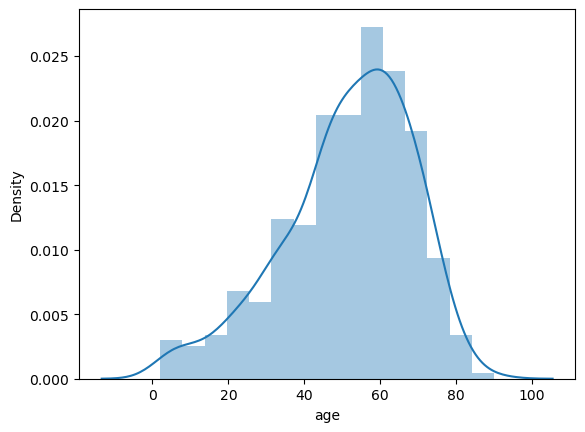

In [33]:
# Activity 2.1: Univariate analysis

sns.distplot(data.age)

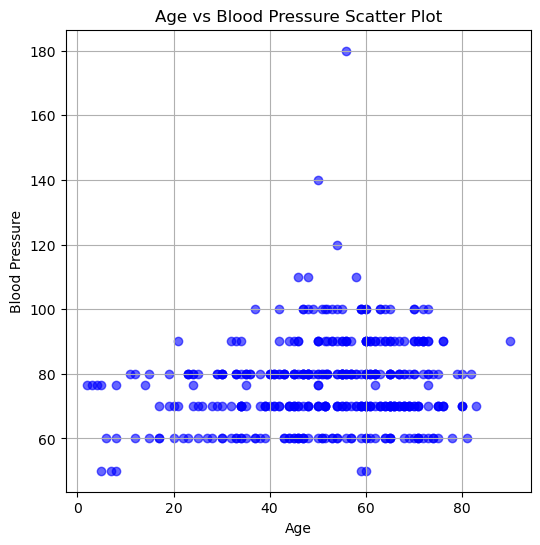

In [34]:
# Activity 2.2: Bivariate analysis

import matplotlib.pyplot as plt

# Create figure and set size
plt.figure(figsize=(6, 6))  # Slightly larger plot for better visibility

# Plot the data
plt.scatter(data['age'], data['blood_pressure'], color='blue', alpha=0.6)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Age vs Blood Pressure Scatter Plot')

# Show the plot
plt.grid(True)
plt.show()


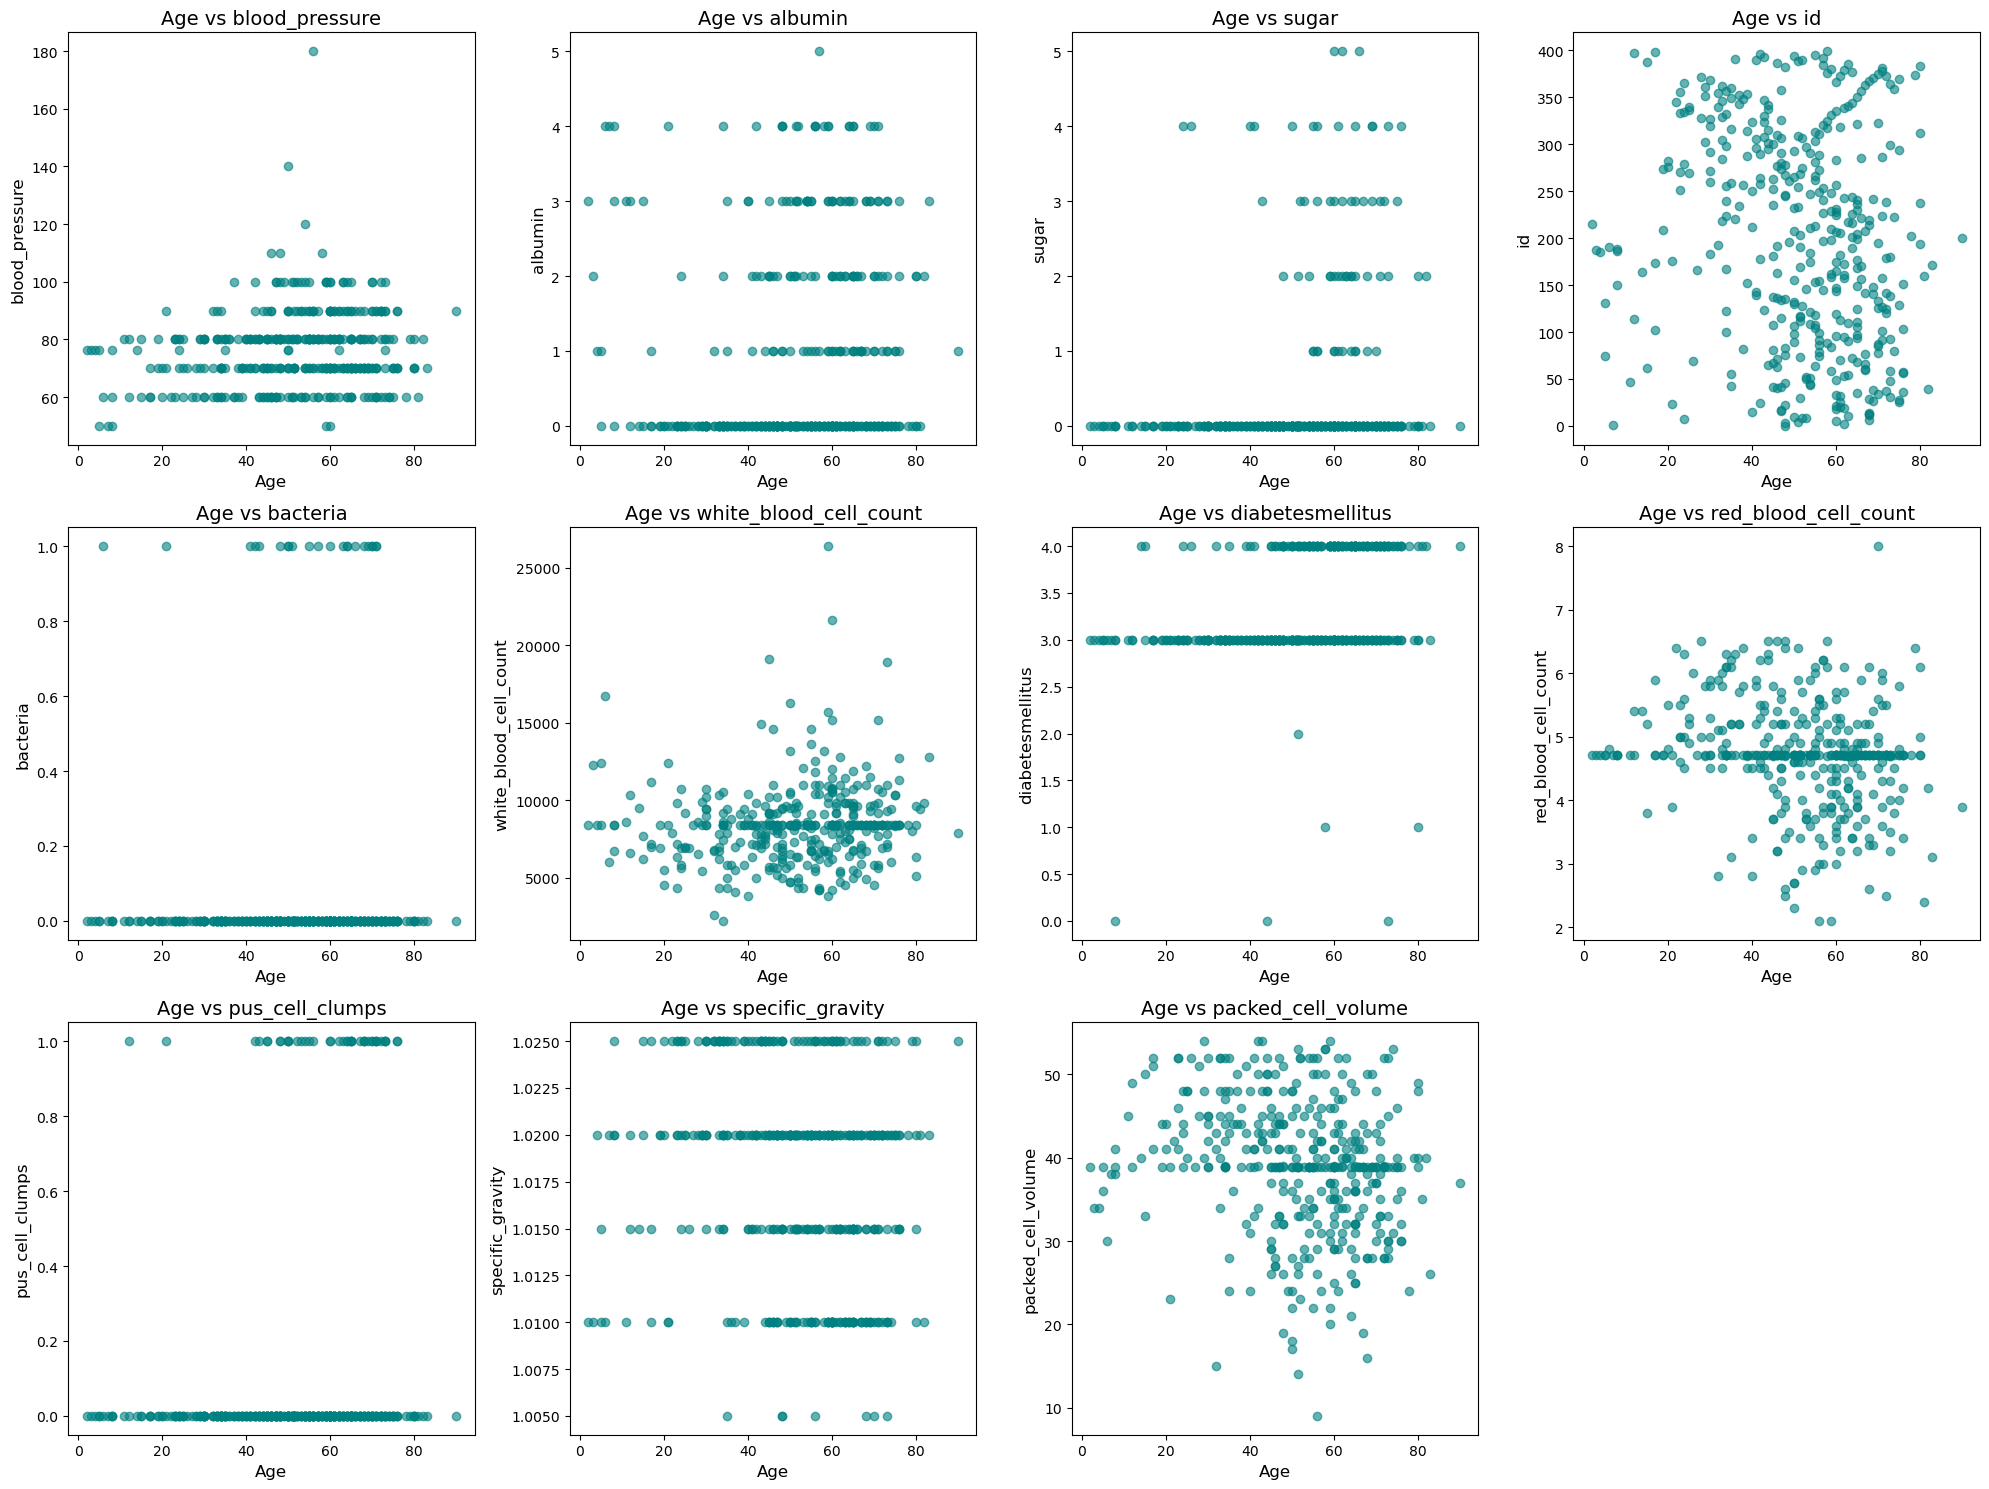

In [35]:
# Activity 2.3: Multivariate analysis

# Age vs all continuous columns

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15), facecolor='white')
plotnumber = 1

for column in contcols:
    if plotnumber <= 11:  # limit to first 11 plots
        ax = plt.subplot(3, 4, plotnumber)  # 3x4 grid of subplots
        plt.scatter(data['age'], data[column], color='teal', alpha=0.6)
        plt.xlabel('Age', fontsize=12)
        plt.ylabel(column, fontsize=12)
        plt.title(f'Age vs {column}', fontsize=14)
        plotnumber += 1

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()


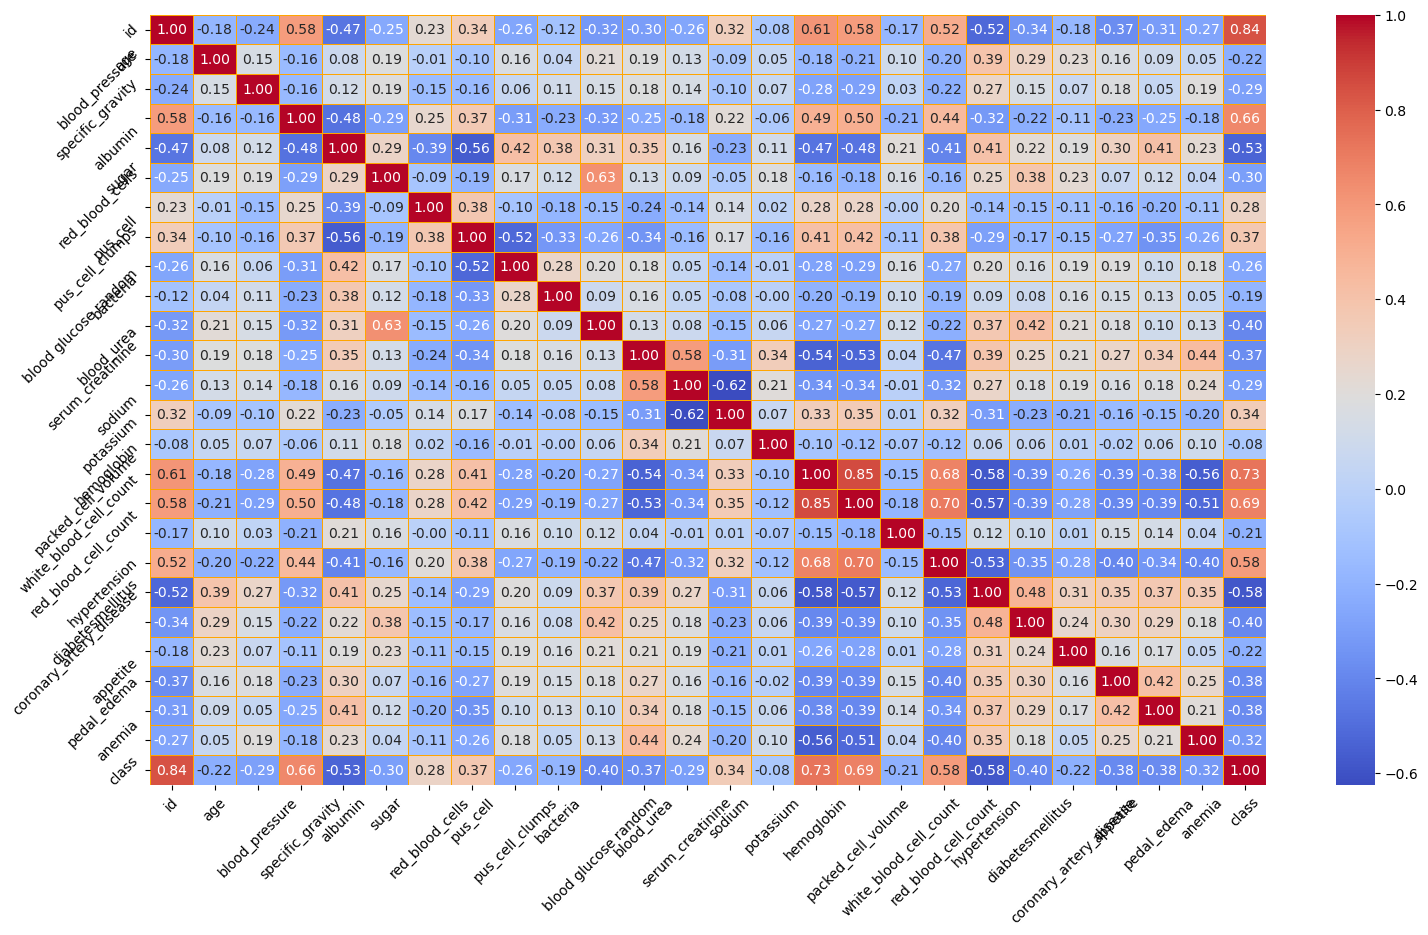

In [36]:
# Finding correlation between the independent Columns
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
f, ax = plt.subplots(figsize=(18, 10))

# Plot correlation heatmap
sns.heatmap(data.corr(), 
            annot=True,           # show correlation values
            fmt=".2f",            # format to 2 decimal places
            ax=ax,                # axis to plot on
            linewidths=0.5,       # line thickness
            linecolor="orange",   # line color
            cmap="coolwarm")      # color theme (you can also try 'viridis', 'magma', etc.)

# Rotate axis labels
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show plot
plt.show()


<Axes: ylabel='count'>

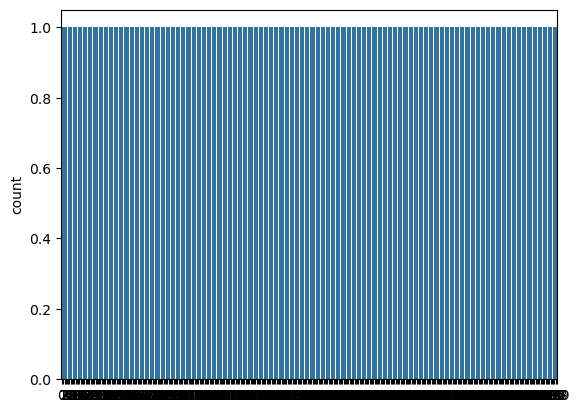

In [37]:
sns.countplot(data['class'])

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_bal = sc.fit_transform(x)

NameError: name 'x' is not defined

In [39]:
# Separate independent and dependent variable

selcols = ['red_blood_cells','pus_cell','blood glucose random','blood_urea',
           'pedal_edema','anemia','diabetese_mellitus','coronary_artery_disease']

x = pd.DataFrame(data, columns=selcols)
y = pd.DataFrame(data, columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [40]:
# Splitting data into train and test

# Splitting the data into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)  # train test split


## Milestone 4: Model Building

In [41]:
# Activity 1: Training the model in multiple algorithms

In [43]:
# Activity 1.1: ANN Mode
 # Importing the Keras libraries and packages
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [44]:
# Creating ANN skeleton view
classification = Sequential()

classification.add(Dense(30, activation='relu'))
classification.add(Dense(128, activation='relu'))
classification.add(Dense(64, activation='relu'))
classification.add(Dense(32, activation='relu'))
classification.add(Dense(1, activation='sigmoid'))


In [45]:
# Compiling the ANN model
# classification.compile(optimize='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
classification.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
# training the model
classification.fit(x_train,y_train,batch_size=10,validation_split=0.2,epochs=100)


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.0653 - loss: 0.6918 - val_accuracy: 0.0000e+00 - val_loss: 0.6894
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0048 - loss: 0.6870 - val_accuracy: 0.0000e+00 - val_loss: 0.6859
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0044 - loss: 0.6780 - val_accuracy: 0.0000e+00 - val_loss: 0.6826
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0011 - loss: 0.6766 - val_accuracy: 0.0000e+00 - val_loss: 0.6795
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0067 - loss: 0.6691 - val_accuracy: 0.0000e+00 - val_loss: 0.6768
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 5.9182e-04 - loss: 0.6680 - val_accuracy: 0.0000e+00 - val_loss: 0.6743
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0048 - loss: 0.6610 - val_accuracy: 0.0000e+00 - val_loss: 0.6714
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0032 -

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

x = pd.DataFrame(data, columns=selcols)
y = pd.DataFrame(data, columns=['class'])


In [49]:
# Step 1: Select independent and dependent columns
selcols = ['red_blood_cells', 'pus_cell', 'blood_glucose_random', 'blood_urea',
           'pedal_edema', 'anemia', 'diabetesmellitus', 'coronary_artery_disease']

x = pd.DataFrame(data, columns=selcols)
y = pd.DataFrame(data, columns=['class'])

# Step 2: Now split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming `data` is your full DataFrame already loaded
selcols = ['red_blood_cells', 'pus_cell', 'blood_glucose_random', 'blood_urea',
           'pedal_edema', 'anemia', 'diabetesmellitus', 'coronary_artery_disease']

x = pd.DataFrame(data, columns=selcols)
y = pd.DataFrame(data, columns=['class'])

print(x.shape)  # Output: (400, 8)
print(y.shape)  # Output: (400, 1)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

print(x_train.shape)  # Output: (320, 8)
print(x_test.shape)   # Output: (80, 8)


sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


classification = Sequential()
classification.add(Dense(30, activation='relu'))
classification.add(Dense(128, activation='relu'))
classification.add(Dense(64, activation='relu'))
classification.add(Dense(32, activation='relu'))
classification.add(Dense(1, activation='sigmoid'))


classification.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
classification.fit(x_train, y_train, batch_size=10, validation_split=0.2, epochs=100)


(400, 8)
(400, 1)
(320, 8)
(80, 8)
Epoch 1/100


C:\Users\KENI\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\KENI\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\KENI\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.1033 - loss: 0.6915 - val_accuracy: 0.0000e+00 - val_loss: 0.6897
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 4.3750e-04 - loss: 0.6868 - val_accuracy: 0.0000e+00 - val_loss: 0.6868
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0144 - loss: 0.6821 - val_accuracy: 0.0000e+00 - val_loss: 0.6838
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0021 - loss: 0.6739 - val_accuracy: 0.0000e+00 - val_loss: 0.6806
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0044 - loss: 0.6804 - val_accuracy: 0.0000e+00 - val_loss: 0.6782
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0044 - loss: 0.6723 - val_accuracy: 0.0000e+00 - val_loss: 0.6755
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0067 - loss: 0.6584 - val_accuracy: 0.0000e+00 - val_loss: 0.6724
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0026 - loss: 0.661

In [51]:
# Activity 1.2: Random Forest model

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy')

rfc.fit(x_train, y_train)


C:\Users\KENI\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [52]:
rfc.fit(x_train, y_train.values.ravel())

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [53]:
y_predict = rfc.predict(x_test)
y_predict_train = rfc.predict(x_train)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Accuracy on test data
print("Test Accuracy:", accuracy_score(y_test, y_predict))

# Accuracy on training data
print("Train Accuracy:", accuracy_score(y_train, y_predict_train))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict))


Test Accuracy: 0.9375
Train Accuracy: 0.928125
Confusion Matrix:
 [[50  0  3]
 [ 1  0  0]
 [ 1  0 25]]


In [55]:
# Activity 1.3: Decision tree model

In [56]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=4, splitter='best', criterion='entropy')

dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [57]:
# Prediction on test set
y_predict = dtc.predict(x_test)
y_predict

array([0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2])

In [58]:
y_predict_train = dtc.predict(x_train)

In [59]:
# Activity 1.4: Logistic Regression

In [60]:
# from sklearn.linear_model import LogisticRegression
# lgr = LogisticRegression()
# lgr.fit(x_train, y_train)


In [61]:
# from sklearn.metrics import accuracy_score,classification_report
# y_predict = lgr.predict(x_test)

In [62]:
# # logistic Regression
# y_pred = lgr.predict([[1, 1, 121.0, 36.0, 0, 1, 0]])
# print(y_pred)
# print(x_train.shape)


In [63]:
# # logistic Regression

# y_pred = lgr.predict([[1, 1, 121.0, 36.0, 0, 1, 0]])
# print(y_pred)


In [64]:
# DecisionTree classifier
y_pred = dtc.predict([[1,1,121.000000,36.0,0,0,1,0]])

print(y_pred)
(y_pred)

[0]


array([0])

In [65]:
# Random Forest Classifier
y_pred = rfc.predict([[1,1,121.000000,36.0,0,0,1,0]])

print(y_pred)
(y_pred)

[0]


array([0])

In [66]:
# classification.save("ckd.h5")
# classification.save('ckd.keras')  # ✅ Save in recommended format

# model.save('my_model.keras')  # ✅ New & preferred format

# classification.save("ckd.h5")          # (optional) legacy HDF5 format
classification.save("ckd.keras")       # ✅ preferred format (recommended)


In [67]:
# testing the model
# y_pred = classification.predict(x_test)

print(x_train.shape)  # should show (n_samples, 8)


(320, 8)


In [68]:
y_pred

array([0])

In [69]:
print(x_train.shape)  # Should show (?, 8)
print(x_test.shape)   # Should also be (?, 8)


(320, 8)
(80, 8)


In [71]:
# Use same columns from training
x_test = test_df[train_df.columns]  # Or use same preprocessing steps


NameError: name 'test_df' is not defined

In [72]:
y_pred = classification.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [73]:
def predict_exit(sample_value):
    # Convert list to numpy array
    sample_value = np.array(sample_value)

    # Reshape because sample_value contains only 1 record
    sample_value = sample_value.reshape(1, -1)

    # Feature Scaling
    sample_value = sc.transform(sample_value)

    return classifier.predict(sample_value)


In [74]:
# test = classification.predict([[1, 1, 121.000000, 36.0, 0, 0, 1, 0]])

# if test == 1:
#     print('Prediction: High chance of CKD!')
# else:
#     print('Prediction: Low chance of CKD.')

import numpy as np

sample = np.array([[1, 1, 121.000000, 36.0, 0, 0, 1, 0]])
test = classification.predict(sample)

if test == 1:
    print('Prediction: High chance of CKD!')
else:
    print('Prediction: Low chance of CKD.')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Prediction: Low chance of CKD.


## Milestone 5: Performance Testing & Evaluate the results

In [75]:
# Activity 1: Testing model with multiple evaluation metrics

In [76]:
# from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report
# import pandas as pd

# dfs = []

# models = [
#     ('LogReg', LogisticRegression()),
#     ('RF', RandomForestClassifier()),
#     ('DecisionTree', DecisionTreeClassifier())
# ]

# results = []
# names = []

# scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
# target_names = ['NO CKD', 'CKD']

# for name, model in models:
#     kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
#     cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)

#     clf = model.fit(x_train, y_train)
#     y_pred = clf.predict(x_test)

#     print(name)
#     print(classification_report(y_test, y_pred, target_names=target_names))

#     results.append(cv_results)
#     names.append(name)

#     this_df = pd.DataFrame(cv_results)
#     this_df['model'] = name
#     dfs.append(this_df)

# final = pd.concat(dfs, ignore_index=True)
# return final


In [77]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Define models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Scoring metrics
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

# K-Fold
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# Collect results
dfs = []

for name, model in models:
    # Cross-validation
    results = cross_validate(model, x_train, y_train.values.ravel(), cv=kfold, scoring=scoring)
    
    # Convert to DataFrame and tag model name
    df = pd.DataFrame(results)
    df['model'] = name
    dfs.append(df)

    # Train and test
    model.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)

    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 40)

# Combine all results
final = pd.concat(dfs, ignore_index=True)
final.groupby("model").mean()


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KENI\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KENI\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\KENI\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py", line 1223, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\KENI\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\KENI\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\KENI\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 1064, in check_array
    _assert_all_finite(
  File "C:\Users\KENI\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 123, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "C:\Users\KENI\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py", line 172, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, 
            xticklabels=['no ckd', 'ckd'], 
            yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression model')
plt.show()
